# 1. Setting up

In [2]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

import matplotlib.pyplot as plt

# Set a fixed random seed to standardize results
np.random.seed(2) # 579

In [3]:
weather = pd.read_csv("weather.csv")
print(weather.head())

   Data.Precipitation   Date.Full  Date.Month  Date.Week of  Date.Year  \
0                0.00  2016-01-03           1             3       2016   
1                0.00  2016-01-03           1             3       2016   
2                0.16  2016-01-03           1             3       2016   
3                0.00  2016-01-03           1             3       2016   
4                0.01  2016-01-03           1             3       2016   

  Station.City Station.Code Station.Location Station.State  \
0   Birmingham          BHM   Birmingham, AL       Alabama   
1   Huntsville          HSV   Huntsville, AL       Alabama   
2       Mobile          MOB       Mobile, AL       Alabama   
3   Montgomery          MGM   Montgomery, AL       Alabama   
4    Anchorage          ANC    Anchorage, AK        Alaska   

   Data.Temperature.Avg Temp  Data.Temperature.Max Temp  \
0                         39                         46   
1                         39                         47   
2    

# 2. Pre-processing

In [4]:
input_cols = ['Date.Month', 'Date.Week of', 'Date.Year', 'Data.Precipitation', 'Data.Temperature.Min Temp', 
'Data.Temperature.Avg Temp', 'Data.Wind.Speed', 'Data.Wind.Direction'] #TODO: choose the input columns
output_col = 'Data.Temperature.Max Temp'

In [5]:
train, test = train_test_split(weather, test_size=0.2)

train_X = train[input_cols]
train_y = train[output_col]

test_X = test[input_cols]
test_y = test[output_col]

In [6]:
print("train input data shape:", train_X.shape)
print("train target data shape:", train_y.shape)
print()
print("test input data shape:", test_X.shape)
print("test target data shape:", test_y.shape)

train input data shape: (13394, 8)
train target data shape: (13394,)

test input data shape: (3349, 8)
test target data shape: (3349,)


# 3. Linear regression

In [7]:
simple_linear_model = LinearRegression()

In [8]:
def rmse(model, X, y):
    predictions = model.predict(X)
    return np.sqrt(mean_squared_error(predictions, y))

In [9]:
simple_linear_model.fit(train_X, train_y)

rmse(simple_linear_model, train_X, train_y)

np.float64(1.4793314123591905)

In [10]:
print(simple_linear_model.intercept_) 
print(simple_linear_model.coef_)

-170.16970034521972
[-0.00475053  0.00326723  0.08454484 -0.08659625 -0.91066147  1.91234703
 -0.01746999  0.01131989]


# 4. Bias - Variance and overfitting

In [11]:
print("Train Error: ", rmse( simple_linear_model, train_X, train_y))
print("Test Error: ", rmse(simple_linear_model, test_X, test_y))

Train Error:  1.4793314123591905
Test Error:  1.0930656366443061


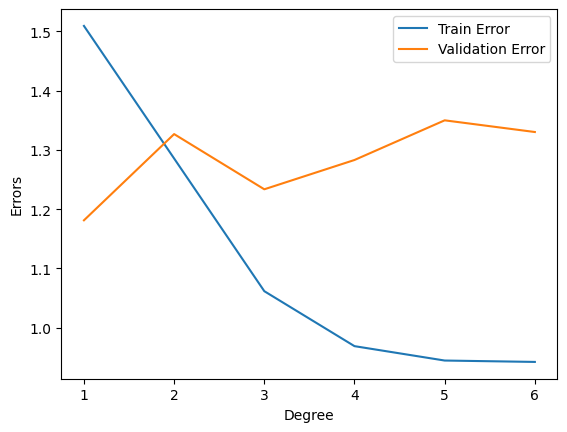

In [12]:
train_X, val_X, train_y, val_y = train_test_split(train_X, train_y, test_size=0.1, random_state=1)

degrees = [1,2,3,4,5,6]
train_errors = []
val_errors = []
for degree in degrees:
    poly_features = PolynomialFeatures(degree) # accont for features of higher degree
    poly_train_X = poly_features.fit_transform(train_X)

    poly_linear_model = LinearRegression()
    poly_linear_model.fit(poly_train_X, train_y)

    train_errors.append(rmse(poly_linear_model, poly_train_X, train_y))
    val_errors.append(rmse(poly_linear_model, poly_features.transform(val_X) , val_y))

# validation vs train error 
plt.plot(degrees, train_errors, label = "Train Error")
plt.plot(degrees, val_errors, label = "Validation Error")
plt.xlabel("Degree")
plt.ylabel("Errors")
plt.legend()
plt.show()